In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [34]:
dataset.head()

,totals_monthly
0,112
1,118
2,132
3,129
4,121


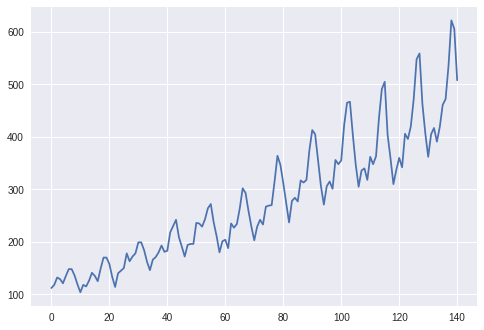

In [35]:
plt.plot(dataset)
plt.show()

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
dataset[:10,:]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [38]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

98 43


This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).


In [0]:
trainX=train[:-1]
trainY=train[1:]

testX=test[:-1]
testY=test[1:]

In [40]:
np.shape(trainX)

(97, 1)

In [41]:
np.shape(trainY)

(97, 1)

In [42]:
trainX[:10,:]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

LSTM input layer has the expectations of 3D inputs.
We can then use the reshape() function on the NumPy array to reshape 
this one-dimensional array into a three-dimensional array 
with first sample size, second time steps, and third feature at each time step.

In [0]:
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1])) 

In [44]:
np.shape(trainX)

(97, 1, 1)

Data is now ready to be used as input (X) to the LSTM with an input_shape of (second, third).

In [0]:
model = Sequential()

model.add(LSTM(50, input_shape=(np.shape(trainX[1,:]))))
#model.add(LSTM(50, input_shape=(np.shape(trainX[1,:])),return_sequences=True))
#model.add(LSTM(100)),


model.add(Dense(1))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY[:,0], epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0286
Epoch 2/100
 - 0s - loss: 0.0116
Epoch 3/100
 - 0s - loss: 0.0095
Epoch 4/100
 - 0s - loss: 0.0070
Epoch 5/100
 - 0s - loss: 0.0052
Epoch 6/100
 - 0s - loss: 0.0036
Epoch 7/100
 - 0s - loss: 0.0028
Epoch 8/100
 - 0s - loss: 0.0023
Epoch 9/100
 - 0s - loss: 0.0021
Epoch 10/100
 - 0s - loss: 0.0022
Epoch 11/100
 - 0s - loss: 0.0021
Epoch 12/100
 - 0s - loss: 0.0022
Epoch 13/100
 - 0s - loss: 0.0021
Epoch 14/100
 - 0s - loss: 0.0021
Epoch 15/100
 - 0s - loss: 0.0021
Epoch 16/100
 - 0s - loss: 0.0021
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0022
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0022
Epoch 25/100
 - 0s - loss: 0.0021
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0022
Epoch 30/100
 - 0s - lo

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [49]:
trainPredict[:10,0]

array([0.04373969, 0.05496535, 0.08117564, 0.07555734, 0.06057993,
       0.08679482, 0.11115335, 0.11115335, 0.08866806, 0.05683675],
      dtype=float32)

In [50]:
trainX[:10,0]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [52]:
np.shape(trainPredict)

(97, 1)

In [53]:
trainPredict[:10,0]

array([126.65716, 132.47205, 146.04898, 143.1387 , 135.3804 , 148.95972,
       161.57744, 161.57744, 149.93007, 133.44144], dtype=float32)

In [54]:
np.shape(trainY)

(97, 1)

In [55]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.68 RMSE
Test Score: 46.88 RMSE


In [56]:
np.shape(dataset)

(141, 1)

In [57]:
np.shape(testPredict)

(42, 1)

In [58]:
np.shape(trainPredict)

(97, 1)

In [59]:
len(dataset)-(len(trainPredict)+(1*2))

42

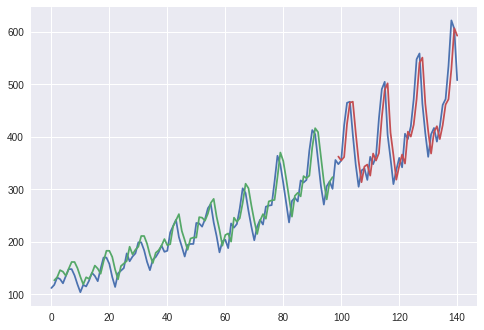

In [60]:
# shift test predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(1*2):len(dataset), :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()